PyCaret's regression module has over 25 algorithms and 10 plots to analyze the performance of models. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's regression module has it all.

# Import Libraries

In [1]:
from pycaret.regression import *
from pycaret.datasets import get_data

# Get Data

In [2]:
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [3]:
# check shape of the data
dataset.shape

(6000, 8)

In [4]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for modelling: ' + str(data.shape))
print('Unseen data for prediction: ' + str(data_unseen.shape))

Data for modelling: (5400, 8)
Unseen data for prediction: (600, 8)


# Setting up environment

The `setup()` function initializes the environment in ***pycaret*** and creates the transformation pipeline to prepare the data for modeling and deployment. `setup()` must be called before executing any other function in ***pycaret***.
- 2 mandatory parameters: ***a pandas dataframe*** and the ***name of the target column***



In [5]:
exp_reg101 = setup(data=data, target='Price', session_id=123)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


# Compare models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using kfold cross validation for metric evaluation. The output prints a score grid that shows average MAE, MSE, RMSE, R2, RMSLE and MAPE accross the folds (10 by default) of all the available models in the model library.

In [6]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,762.0118,2763999.1585,1612.2410,0.9729,0.0817,0.0607,0.1990
rf,Random Forest Regressor,760.6304,2929683.1860,1663.0148,0.9714,0.0818,0.0597,0.1760
lightgbm,Light Gradient Boosting Machine,752.6446,3056347.8515,1687.9907,0.9711,0.0773,0.0567,0.0180
gbr,Gradient Boosting Regressor,920.2913,3764303.9252,1901.1793,0.9633,0.1024,0.0770,0.0390
dt,Decision Tree Regressor,1003.1237,5305620.3379,2228.7271,0.9476,0.1083,0.0775,0.0060
ridge,Ridge Regression,2413.5704,14120492.3795,3726.1643,0.8621,0.6689,0.2875,0.0040
lasso,Lasso Regression,2412.1922,14246798.1211,3744.2305,0.8608,0.6767,0.2866,0.2660
llar,Lasso Least Angle Regression,2355.6152,14272020.4773,3745.3095,0.8607,0.6391,0.2728,0.0050
br,Bayesian Ridge,2415.8031,14270771.8397,3746.9951,0.8606,0.6696,0.2873,0.0050
lr,Linear Regression,2418.7036,14279370.2389,3748.9580,0.8604,0.6690,0.2879,0.6510


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [7]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4101.8809,23013830.0177,4797.2732,0.7473,0.4758,0.5470
1,4251.5693,29296751.6657,5412.6474,0.7755,0.4940,0.5702
2,4047.8474,22291660.1785,4721.4045,0.7955,0.5068,0.5871
3,4298.3867,23482783.6839,4845.9038,0.7409,0.5089,0.5960
4,3888.5584,24461807.7242,4945.8880,0.6949,0.4764,0.5461
5,4566.4889,29733914.8752,5452.8813,0.7462,0.5462,0.6598
6,4628.7271,27841092.1974,5276.4659,0.7384,0.5549,0.6676
7,4316.4317,25979752.0083,5097.0336,0.6715,0.5034,0.5858
8,3931.2163,21097072.3513,4593.1549,0.7928,0.4858,0.5513


In [9]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2629.7158,16222922.0054,4027.7689,0.8219,0.2553,0.2244
1,2764.7250,25273189.9003,5027.2448,0.8063,0.2714,0.2357
2,2605.9909,16883405.3119,4108.9421,0.8451,0.2617,0.2352
3,2588.0395,14475338.1062,3804.6469,0.8403,0.2685,0.2271
4,2403.7173,13602075.2435,3688.0991,0.8303,0.2672,0.2223
5,2538.7416,20724600.2592,4552.4280,0.8231,0.2644,0.2260
6,2720.2195,19796302.1522,4449.3036,0.8140,0.2644,0.2280
7,2707.6016,17084596.1502,4133.3517,0.7839,0.2743,0.2475
8,2444.0262,16340453.5625,4042.3327,0.8395,0.2623,0.2199


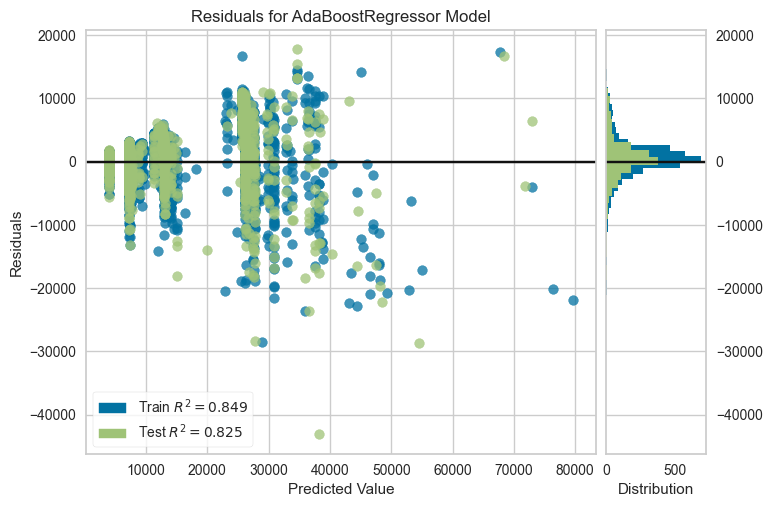

In [10]:
# residual plot
plot_model(tuned_ada)

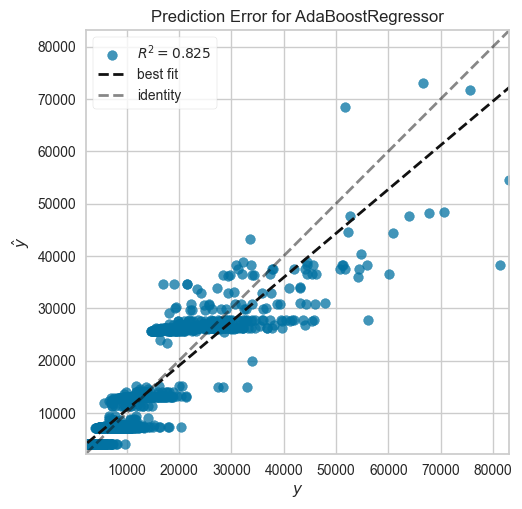

In [11]:
# prediction error plot
plot_model(tuned_ada, plot='error')

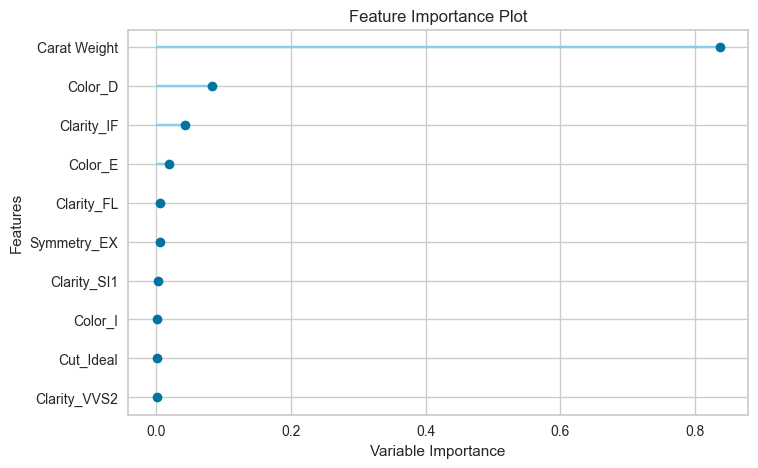

In [12]:
# feature importance plot
plot_model(tuned_ada, plot='feature')

In [13]:
# predict on test / holdout samples
predict_model(tuned_ada)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,2753.5560,19239427.3255,4386.2772,0.8245,0.2717,0.2331


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,...,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,1.16,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7059,7289.223684
1,1.14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5809,7262.857419
2,1.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,10641,8881.645401
3,0.79,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2871,4021.384309
4,2.23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,21706,27516.784226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,1.22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12906,7311.014368
1617,0.83,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3235,4021.384309
1618,1.51,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,9058,12837.652605
1619,1.16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5091,7289.223684


In [14]:
# finalize model for deployment
final_ada = finalize_model(tuned_ada)
# final adaboost parameters for deployment
print(final_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
                  n_estimators=90, random_state=123)


In [15]:
# predict on unseen data
unseen_predictions = predict_model(final_ada, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,2601.1873,15958520.6453,3994.8117,0.8622,0.2609,0.2296


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.21,Ideal,G,VVS1,EX,EX,GIA,11572,7464.563610
1,2.00,Ideal,I,SI1,EX,VG,GIA,16775,24940.226202
2,1.51,Good,F,SI1,VG,G,GIA,10429,12870.715339
3,0.90,Ideal,F,SI1,EX,EX,GIA,4523,4043.160479
4,1.01,Very Good,I,SI1,VG,VG,GIA,4375,7172.492974


In [16]:
# saving the model
save_model(final_ada, 'Final Adaboost model test')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                 ('dummy', Dummify(target='Price')),
                 ('fix_perfect', Remove_100(target='Price')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough

In [17]:
# loading the saved model
saved_final_model = load_model('Final Adaboost model test')

Transformation Pipeline and Model Successfully Loaded


In [18]:
new_prediction = predict_model(saved_final_model, data=data_unseen)
new_prediction.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,2601.1873,15958520.6453,3994.8117,0.8622,0.2609,0.2296


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.21,Ideal,G,VVS1,EX,EX,GIA,11572,7464.563610
1,2.00,Ideal,I,SI1,EX,VG,GIA,16775,24940.226202
2,1.51,Good,F,SI1,VG,G,GIA,10429,12870.715339
3,0.90,Ideal,F,SI1,EX,EX,GIA,4523,4043.160479
4,1.01,Very Good,I,SI1,VG,VG,GIA,4375,7172.492974
